Let us consider the **House Pricing** dataset, where we have a lot of information about the houses being sold and aim to produce the price of the house. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


let us plot every feature vs the price. 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

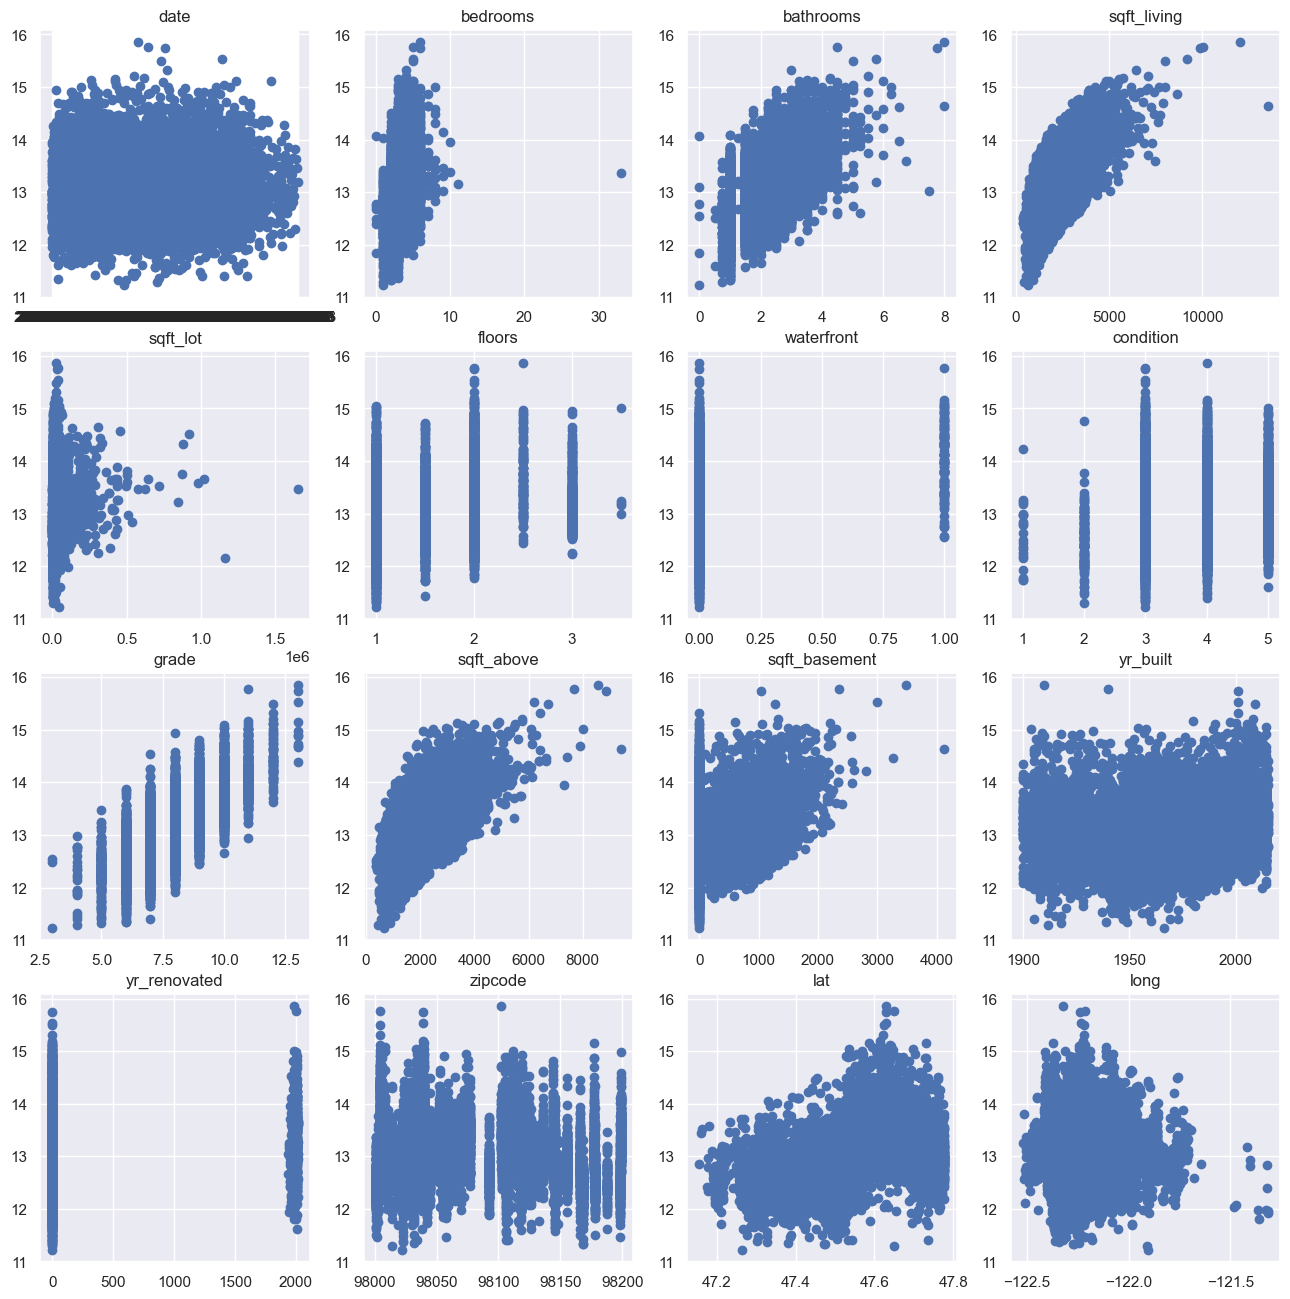

In [4]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

In [6]:
datX = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']]
X = datX.values
N = len(datX)
m = 10

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$


In [7]:
def loss(w, X, y):
    lossValue = np.sum((np.dot(X, w) - y)**2) / (N)
    return lossValue

In [8]:
def grad(w_k, X, y):
    gradient = 2 * np.dot(X.T, np.dot(X, w_k) - y) / N
    return gradient


$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum


In [9]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    #your code goes here
    while curiter < maxiter: 
        w_k = w_k - alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        
        if np.linalg.norm(grad(w_k, X, y)) < eps:
            break
        
    return weights, losses

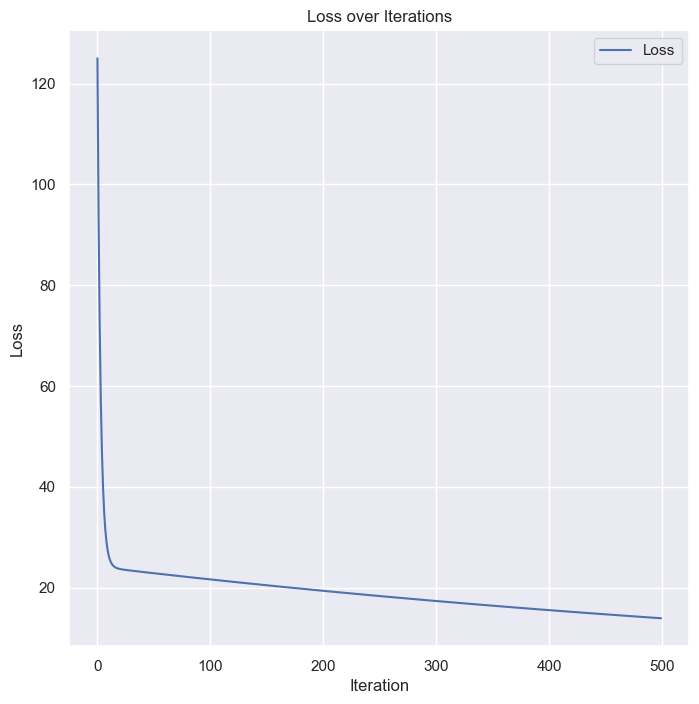

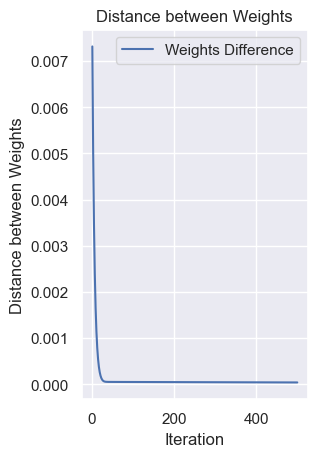

In [10]:
#experiment №1

plt.figure(figsize=(8,8))

X = np.concatenate((np.ones((15000, 1)), datX), axis=1)
w_init = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
alpha = 0.0000001 
weights, losses  = gradDescent(w_init, alpha, X, datY, maxiter=500, eps=1e-2)

plt.plot(range(len(losses)), losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
weights_diff = [np.linalg.norm(weights[i] - weights[i-1]) for i in range(1, len(weights))]
plt.plot(range(1, len(weights)), weights_diff, label='Weights Difference')
plt.xlabel('Iteration')
plt.ylabel('Distance between Weights')
plt.title('Distance between Weights')
plt.legend()

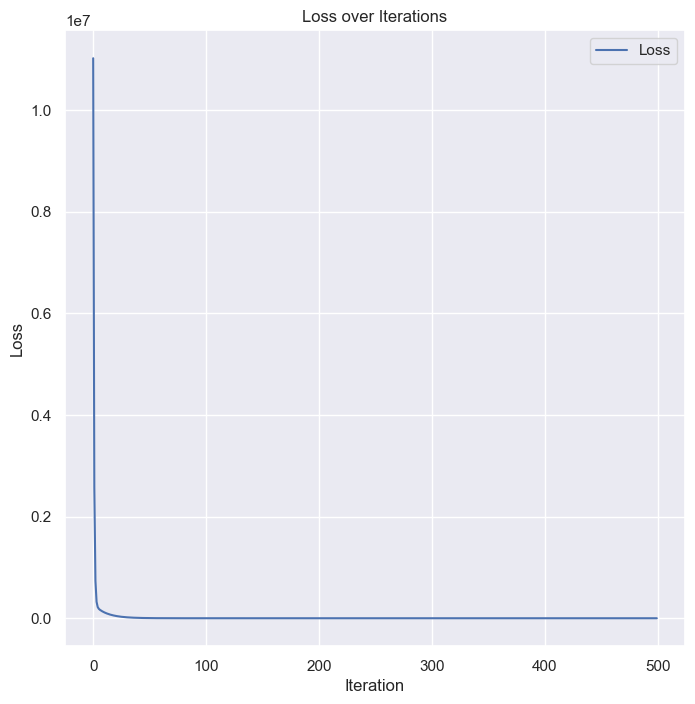

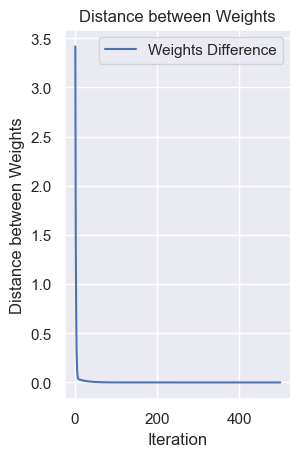

In [11]:
#experiment №2

plt.figure(figsize=(8,8))

X = np.concatenate((np.ones((15000, 1)), datX), axis=1)
w_init = [4, 2, 1, 3, 0.4, 0.2, 1, 0.1, 0.2, 0.4, 0.1]
alpha = 0.00000008 
weights, losses  = gradDescent(w_init, alpha, X, datY, maxiter=500, eps=1e-2)

plt.plot(range(len(losses)), losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
weights_diff = [np.linalg.norm(weights[i] - weights[i-1]) for i in range(1, len(weights))]
plt.plot(range(1, len(weights)), weights_diff, label='Weights Difference')
plt.xlabel('Iteration')
plt.ylabel('Distance between Weights')
plt.title('Distance between Weights')
plt.legend()

Let us check the adequacy of the model we created.

lets choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$



In [12]:
import copy
X = np.concatenate((np.ones((15000, 1)), datX), axis=1)
w_init = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
alpha = 0.0000001 
weights, losses  = gradDescent(w_init, alpha, X, datY, maxiter=500, eps=1e-2)


five_houses = copy.deepcopy(X[:5])
weig = weights[-1]
res = np.dot(five_houses, weig)
print(res)
print(datY[:5])

[17.3456032  13.42959033  8.29875409 14.44053889 13.35455703]
[13.36138028 13.031782   12.36307639 12.9360338  13.22220871]


Now we transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

In [13]:
def norm(X):
    mean_vals = np.mean(X, axis=0)
    std_devs = np.std(X, axis=0)
    
    std_devs[std_devs == 0] = 1
    
    standardized_X = (X - mean_vals) / std_devs
    return standardized_X

Now we repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent



if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

In [17]:
def new_loss(w, X, y, a, b):
    lossValue = np.sum(np.where(y > np.dot(X, w), a * (np.dot(X, w) - y)**2, b * (np.dot(X, w) - y)**2)) / N
    return lossValue


def new_grad(w_k, X, y, a, b):
    lossGradient = 2/N * np.dot(X.T, (np.where(y > np.dot(X, w_k), a*(np.dot(X, w_k)-y), b*(np.dot(X, w_k)- y))))
    return lossGradient

def new_gradDescent(w_init, alpha, X, y, maxiter, eps, a, b):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    #your code goes here
    while curiter < maxiter: 
        w_k = w_k - alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        curiter += 1
        
        if np.linalg.norm(new_grad(w_k, X, y, a, b)) < eps:
            break
        
    return weights, losses

Now let us experiment with new functions 

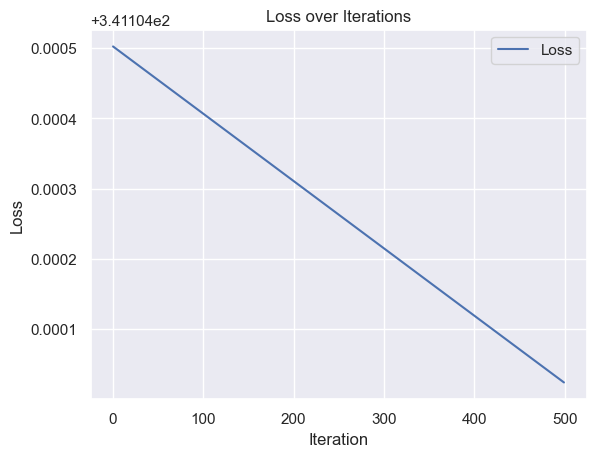

In [18]:
#test1
#if 𝑎1/𝑏1>1  
a1, b1 = 2, 1

X = np.concatenate((np.ones((15000, 1)), datX), axis=1)
X = norm(X)
w_init = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
maxiter=500
eps=1e-2
alpha = 0.0000001 
weights_exp1, losses_exp1  = new_gradDescent(w_init, alpha, X, datY, maxiter, eps, a1, b1)

plt.plot(range(len(losses_exp1)), losses_exp1, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()


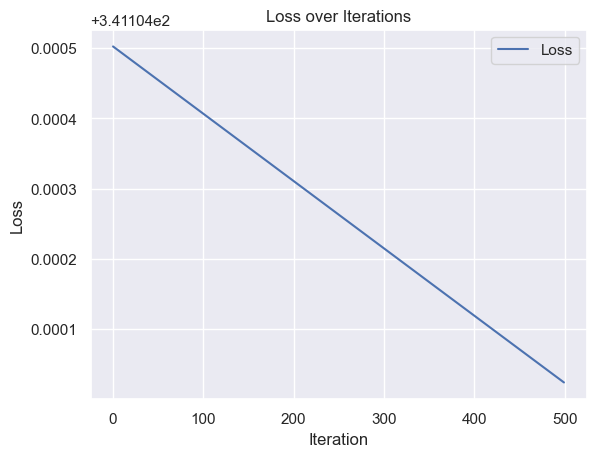

In [19]:
#test2
#if 𝑎2/𝑏2<1
a2, b2 = 2, 3

X = np.concatenate((np.ones((15000, 1)), datX), axis=1)
X = norm(X)
w_init = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
maxiter=500
eps=1e-2
alpha = 0.0000001 

weights_exp2, losses_exp2  = new_gradDescent(w_init, alpha, X, datY, maxiter, eps, a2, b2)



plt.plot(range(len(losses_exp2)), losses_exp2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

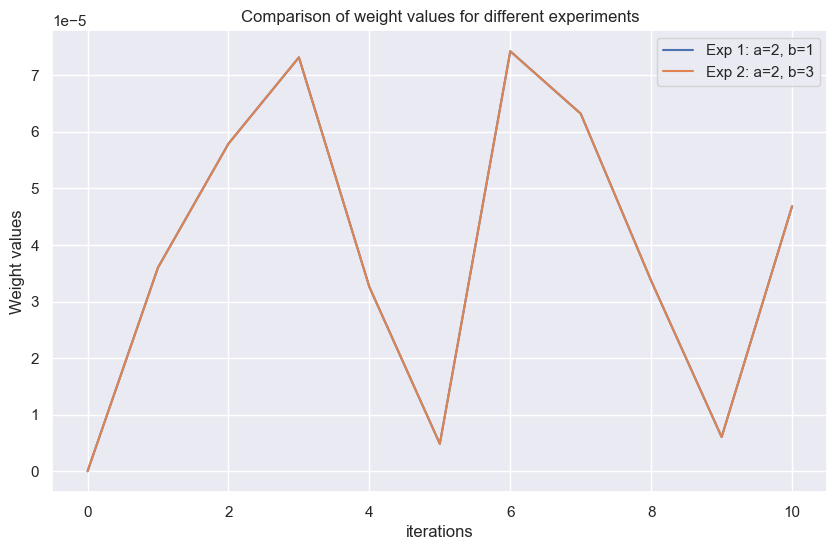

In [20]:
# Plotting a graph to compare the values of weights
plt.figure(figsize=(10, 6))

plt.plot(weights_exp1[-1], label=f'Exp 1: a={a1}, b={b1}')
plt.plot(weights_exp2[-1], label=f'Exp 2: a={a2}, b={b2}')

plt.title('Comparison of weight values for different experiments')
plt.xlabel('iterations')
plt.ylabel('Weight values')
plt.legend()
plt.show()

we see that our graphs are the same